In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
numberOfParticles = 500
numberOfCompartments = 10
numberOfCycles = 1000

distribution = np.zeros((numberOfCompartments, numberOfParticles))
particlesInCompartment = np.zeros(numberOfCompartments, dtype=np.int32)

In [3]:
def analytical(numberOfParticles, numberOfCompartments):
    idx = np.arange(numberOfParticles)
    
    # get binomial coefficients npr(N, j) in array
    binomCoeffs = scipy.special.binom(numberOfParticles, idx)
    
    # precompute p
    p = 1 / numberOfCompartments
    
    # return binomial pmf
    return binomCoeffs * p**idx * (1-p)**(numberOfParticles - idx)

In [4]:
for cycle in range(numberOfCycles):
    # for each particle, determine the compartment index
    indices = np.random.randint(0, numberOfCompartments, numberOfParticles)
    
    # count how many particles are in each compartment (returns (ids, counts))
    counts = np.unique(indices, return_counts=True)
    
    # add those to the distribution
    np.add.at(distribution, counts, 1)
distribution /= numberOfCycles

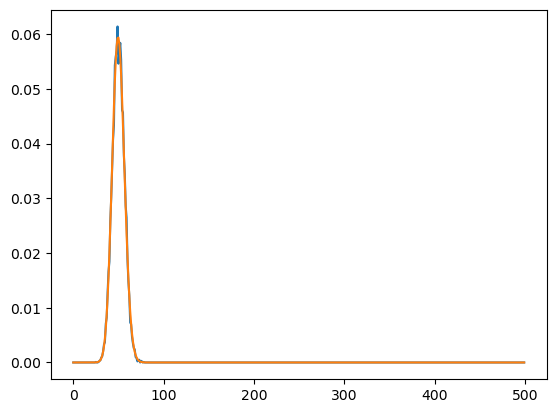

In [5]:
fig, ax = plt.subplots()
ax.plot(np.mean(distribution, axis=0))
ax.plot(analytical(numberOfParticles, numberOfCompartments))